In [2]:
from sympy import *
init_printing()

In [118]:
eps = Symbol('epsilon', real=True, positive=True)
p = Symbol('p', integer=True, positive=True, even=True)
phi = Symbol('phi', real=True)

In [259]:
aphi = abs(phi)
V_power = (eps**p+aphi**p)**(1/p)
V_exp = 1/eps * log(exp(eps*aphi)+1)
V_hyp = aphi/(1+eps*aphi)

In [263]:
display(V_exp)
V_exp.series(phi, 0,8)

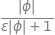

In [146]:
display(V_hyp)
V_hyp.series(phi, 0,11)

In [257]:
p_val = 1.
phi_val = eps*(1.5)
eps_val = 1
max_Order = p_val*20

series = V_power.subs(p, p_val).series(phi, 0, max_Order)
display(Eq(V_power.subs(p,p_val), series))

actual = V_power.subs(phi, phi_val).subs(eps,eps_val).subs(p, p_val)
display(N(actual))
N_series = float(sum(series.subs(phi, phi_val).args[:-1]).subs(eps,eps_val))
display(N_series)

print(f'diff: {N(actual)-N_series}')


diff: 0


In [76]:
def radius_of_convergence(expr, var):
    # Get the series expansion of the expression around the variable
    series = expr.series(var, 0, 20)
    
    # Extract the coefficients of the power series
    coeffs = [series.coeff(var, n) for n in range(20)]
    
    # Compute the |a_n|^(1/n) sequence
    seq = [Abs(coeffs[n])**(1/n) for n in range(1, 20)]

    display(seq)
    
    # Find the limit superior manually
    lim_sup = max(seq)
    
    # Compute the radius of convergence
    if lim_sup == 0:
        R = oo  # If lim_sup is zero, the radius is infinity
    else:
        R = 1 / lim_sup
    
    return R, series



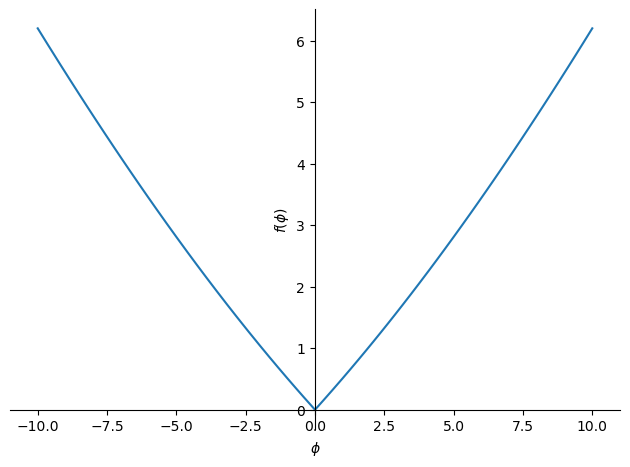

In [78]:
eps_num = 0.1

func = (V_power, V_exp, V_hyp)[1]

func = func.subs(p, 2).subs(eps, eps_num)


display(func)

plot(func)

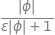

In [98]:
func = V_hyp.subs(p, 2)
func_series = sum(func.series(phi, 0, 20).args[:-1])

display(func)
display(func_series)

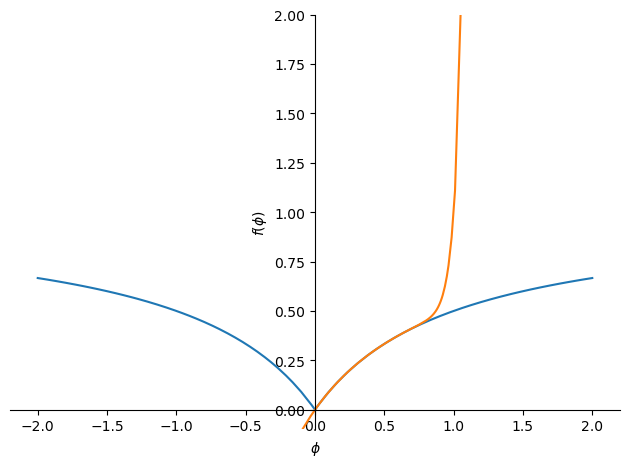

In [100]:
eps_num = 1

plot(func.subs(eps, eps_num), func_series.subs(eps, eps_num), (phi, -2*eps_num, 2*eps_num), ylim=(-0.1*eps_num,2*eps_num))